# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME_1 = 'my_ssd_mobnet_step1' 
CUSTOM_MODEL_NAME_2 = 'my_ssd_mobnet_step2' 
CUSTOM_MODEL_NAME_3 = 'my_ssd_mobnet_step3' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord_1.py'
LABEL_MAP_NAME_1 = 'label_map_1.pbtxt'
LABEL_MAP_NAME_2 = 'label_map_2.pbtxt'
LABEL_MAP_NAME_3 = 'label_map_3.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace1'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH_1': os.path.join('Tensorflow', 'workspace1','annotations'),
    'ANNOTATION_PATH_2': os.path.join('Tensorflow', 'workspace2','annotations'),
    'ANNOTATION_PATH_3': os.path.join('Tensorflow', 'workspace3','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace1','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace1','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace1','pre-trained-models'),
    'CHECKPOINT_PATH_1': os.path.join('Tensorflow', 'workspace1','models',CUSTOM_MODEL_NAME_1), 
    'CHECKPOINT_PATH_2': os.path.join('Tensorflow', 'workspace2','models',CUSTOM_MODEL_NAME_2), 
    'CHECKPOINT_PATH_3': os.path.join('Tensorflow', 'workspace3','models',CUSTOM_MODEL_NAME_3), 
 }

In [4]:
files = {
    'PIPELINE_CONFIG_1':os.path.join('Tensorflow', 'workspace1','models', CUSTOM_MODEL_NAME_1, 'pipeline.config'),
    'PIPELINE_CONFIG_2':os.path.join('Tensorflow', 'workspace2','models', CUSTOM_MODEL_NAME_2, 'pipeline.config'),
    'PIPELINE_CONFIG_3':os.path.join('Tensorflow', 'workspace3','models', CUSTOM_MODEL_NAME_3, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP_1': os.path.join(paths['ANNOTATION_PATH_1'], LABEL_MAP_NAME_1),
    'LABELMAP_2': os.path.join(paths['ANNOTATION_PATH_2'], LABEL_MAP_NAME_2),
    'LABELMAP_3': os.path.join(paths['ANNOTATION_PATH_3'], LABEL_MAP_NAME_3)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 8. Load Train Model From Checkpoint

In [6]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

C:\Users\bora1\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [28]:
!pip install tensorflow --upgrade

In [7]:
!pip install protobuf==3.20





[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Load pipeline config and build a detection model
configs1 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG_1'])
configs2 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG_2'])
configs3 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG_3'])
detection_model_1 = model_builder.build(model_config=configs1['model'], is_training=False)
detection_model_2 = model_builder.build(model_config=configs2['model'], is_training=False)
detection_model_3 = model_builder.build(model_config=configs3['model'], is_training=False)

# Restore checkpoint
ckpt_1 = tf.compat.v2.train.Checkpoint(model=detection_model_1)
ckpt_1.restore(os.path.join(paths['CHECKPOINT_PATH_1'], 'ckpt-3')).expect_partial()

ckpt_2 = tf.compat.v2.train.Checkpoint(model=detection_model_2)
ckpt_2.restore(os.path.join(paths['CHECKPOINT_PATH_2'], 'ckpt-3')).expect_partial()

ckpt_3 = tf.compat.v2.train.Checkpoint(model=detection_model_3)
ckpt_3.restore(os.path.join(paths['CHECKPOINT_PATH_3'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn_1(image):
    image, shapes = detection_model_1.preprocess(image)
    prediction_dict = detection_model_1.predict(image, shapes)
    detections = detection_model_1.postprocess(prediction_dict, shapes)
    return detections

def detect_fn_2(image):
    image, shapes = detection_model_2.preprocess(image)
    prediction_dict = detection_model_2.predict(image, shapes)
    detections = detection_model_2.postprocess(prediction_dict, shapes)
    return detections

def detect_fn_3(image):
    image, shapes = detection_model_3.preprocess(image)
    prediction_dict = detection_model_3.predict(image, shapes)
    detections = detection_model_3.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index_1 = label_map_util.create_category_index_from_labelmap(files['LABELMAP_1'])
category_index_2 = label_map_util.create_category_index_from_labelmap(files['LABELMAP_2'])
category_index_3 = label_map_util.create_category_index_from_labelmap(files['LABELMAP_3'])

In [14]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'pala5.jpg')

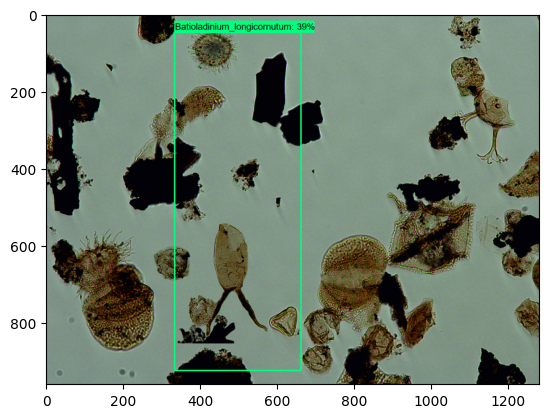

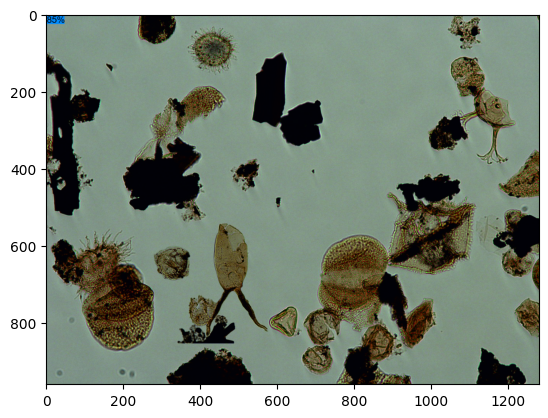

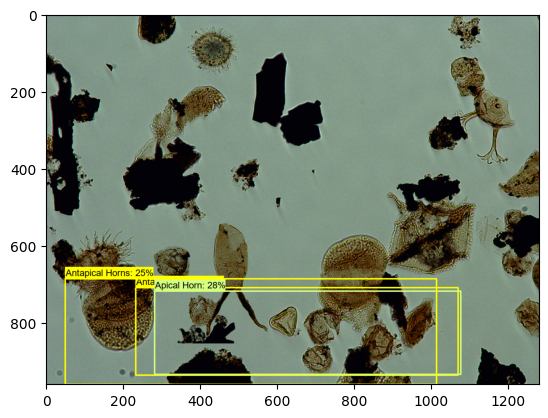

In [15]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn_1(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index_1,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1,
            min_score_thresh=.0,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

detections1 = detect_fn_2(input_tensor)

num_detections1 = int(detections1.pop('num_detections'))
detections1 = {key: value[0, :num_detections1].numpy()
              for key, value in detections1.items()}
detections1['num_detections'] = num_detections1

# detection_classes should be ints.
detections1['detection_classes'] = detections1['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections1['detection_boxes'],
            detections1['detection_classes']+label_id_offset,
            detections1['detection_scores'],
            category_index_2,
            use_normalized_coordinates=False,
            max_boxes_to_draw=1,
            min_score_thresh=.1,
            agnostic_mode=True)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

detections1 = detect_fn_3(input_tensor)

num_detections1 = int(detections1.pop('num_detections'))
detections1 = {key: value[0, :num_detections1].numpy()
              for key, value in detections1.items()}
detections1['num_detections'] = num_detections1

# detection_classes should be ints.
detections1['detection_classes'] = detections1['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections1['detection_boxes'],
            detections1['detection_classes']+label_id_offset,
            detections1['detection_scores'],
            category_index_3,
            use_normalized_coordinates=True,
            max_boxes_to_draw=3,
            min_score_thresh=.1,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()